In [1]:
import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
import IPython
from IPython.display import Audio

from datasets import SimpleWavHandler
from torch.utils.data import DataLoader

from noise_sched import linear_beta_schedule, get_index_from_list, forward_diffusion_sample

In [2]:
device = torch.device('cpu')
sr = 16000
sample_size = 2**16
batch_size = 1
wav_path = '../datasets/ww_the_deep.wav'
wav_dataset = SimpleWavHandler(wav_path, sr, mono=True,
                                sample_size=sample_size, 
                                unfolding_step=sample_size//2)
wav_dataloader = DataLoader(wav_dataset, batch_size=batch_size, shuffle=False)

In [3]:
t_max = 5
betas = linear_beta_schedule(timesteps=t_max, end=0.8)

In [4]:
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)

wav_sample = next(iter(wav_dataloader))[0]
print(wav_sample.shape)

torch.Size([65536])


C:\Users\epirt\AppData\Local\Temp\ipykernel_8700\1673991624.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, num_images+1, int(idx/stepsize) + 1)


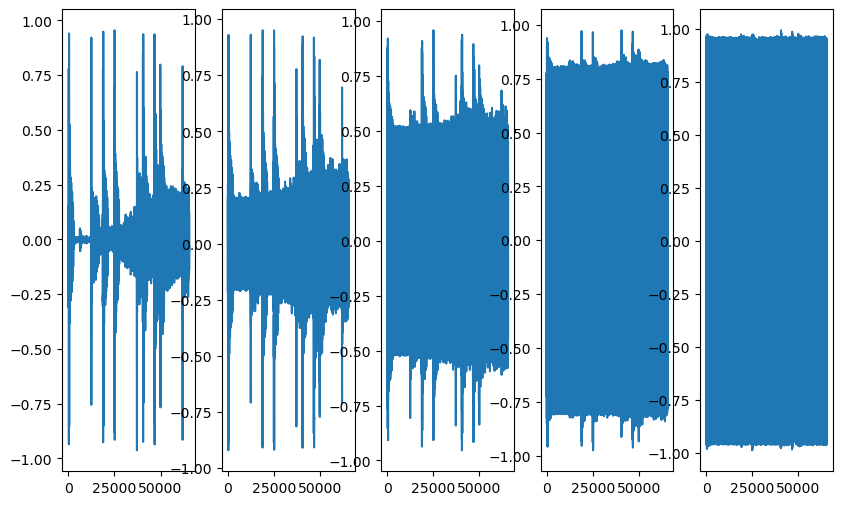

In [5]:
plt.figure(figsize=(12, 6))
plt.axis('off')
num_images = 5
stepsize = int(t_max/num_images)

wav_sample_list = []

for idx in range(0, t_max, stepsize):
    t = torch.Tensor([idx]).type(torch.int64)
    plt.subplot(1, num_images+1, int(idx/stepsize) + 1)
    wav_sample_n, noise = forward_diffusion_sample(wav_sample, t, alphas_cumprod)
    wav_sample_list.append(wav_sample_n)
    plt.plot(wav_sample_n)
plt.show()

In [6]:
for idx in range(num_images):
    sample = wav_sample_list[idx].cpu().detach().numpy()
    IPython.display.display(IPython.display.Audio(sample, rate=sr))

In [11]:
from nets.wavenet import CasualConv1D


in_ch = out_ch = 1
kernel_size = 2
conv = CasualConv1D(in_ch, out_ch, kernel_size)

x = torch.ones((1, 1, 10))
y_caus, y = conv(x)

print(x)
print(y)
print(y_caus)

AttributeError: cannot assign module before Module.__init__() call